In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
avocado = pd.read_csv('avocado_info.csv')

In [6]:
avocado.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


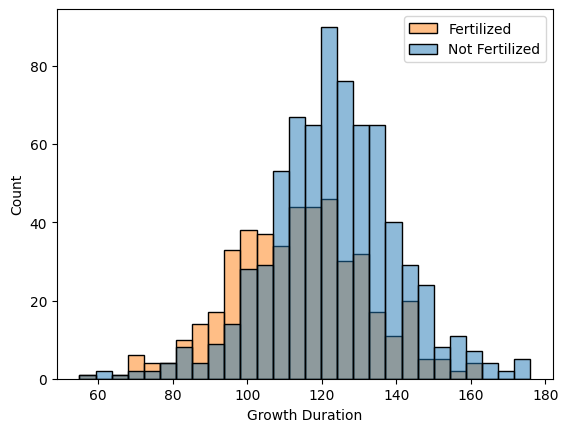

In [9]:
# hypothesis test
sns.histplot(data=avocado,x='Growth Duration',hue='Fertilizer')
plt.legend(['Fertilized','Not Fertilized'])
plt.show()

In [12]:
#permutation test
fertilized = avocado.loc[avocado.Fertilizer==True]
not_fertilized = avocado.loc[avocado.Fertilizer==False]

observed = np.mean(fertilized['Growth Duration']) - np.mean(not_fertilized['Growth Duration'])
observed

-9.266142572024918

In [16]:
avocado['Growth Duration'].sample(frac=1).reset_index(drop=True)

0       104
1       125
2       124
3       144
4       140
       ... 
1169     86
1170     55
1171    126
1172     98
1173    108
Name: Growth Duration, Length: 1174, dtype: int64

In [17]:
def perm(data):
    return data.sample(frac=1).reset_index(drop=True)

In [20]:
sim = np.array([])
reps = 10000
for i in range(reps):
    perm_info = perm(avocado['Growth Duration'])
    df = pd.DataFrame({'Permuted Duration':perm_info,'Fertilizer':avocado.Fertilizer})
    fertilized = df.loc[df.Fertilizer==True,'Permuted Duration']
    not_fertilized = df.loc[df.Fertilizer==False,'Permuted Duration']
    stat = np.mean(fertilized) - np.mean(not_fertilized)
    sim = np.append(sim,stat)

In [21]:
sim

array([-2.34058534, -0.27651172,  1.29032406, ..., -0.91326234,
       -1.32822341,  0.97194875])

In [22]:
np.count_nonzero(sim <= observed)/reps

0.0

In [26]:
#confidence interval
# np.random.choice(fertilized,size=len(fertilized))
# np.random.choice(not_fertilized,size=len(not_fertilized))
def resample(og_sample):
    return np.random.choice(og_sample,size=len(og_sample))

In [29]:
def bootstrap(og_sample,reps):
    means = np.array([])
    for i in range(reps):
        new_sample = resample(og_sample)
        new_mean = np.mean(new_sample)
        means = np.append(means,new_mean)
    return means

In [30]:
fertilized_means = bootstrap(fertilized,10000)
not_fertilized_means = bootstrap(not_fertilized,10000)
estimates = fertilized_means - not_fertilized_means

In [31]:
estimates

array([ 0.37082134,  1.67473833,  1.29376114, ..., -0.16348401,
        2.49152764,  1.25298841])

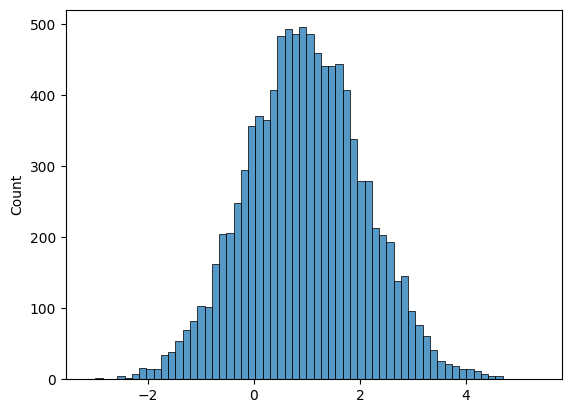

In [33]:
sns.histplot(estimates)
plt.show()

In [34]:
(np.percentile(estimates,2.5),np.percentile(estimates,97.5))

(-1.2158169172875102, 3.154873166049641)